In [2]:
import os
import shutil
import zipfile
import tarfile
from torchvision import datasets
import matplotlib.pyplot as plt

## Data loading

### Download pix2pix and cyclegan datasets

In [3]:
def unzip_file(zip_path, extract_to):
    print(f"Unzipping {zip_path} ...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(" --> done!")


def untar_file(tar_path, extract_to):
    print(f"Extracting {tar_path} ...")
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_to)
    print(" --> done!")

In [4]:
def download_cyclegan_pix2pix_dataset(dataset_type: str, dataset_name: str, download_folder = "data"):
    """
    Download on of the dataset from Cyclegan or pix2pix.

    dataset_type: one of "pix2pix", "cyclegan"
    dataset_name: 
        Cyclegan:
            # Unpaired
            "apple2orange",
            "summer2winter_yosemite",
            "horse2zebra",
            "monet2photo",
            "cezanne2photo",
            "ukiyoe2photo",
            "vangogh2photo",
        Pix2Pix:
            "facades"
            "cityscapes"
            "maps"
            "edges2shoes"
            "edges2handbags"
            "night2day"
    download_folder: folder to store the dataset
    """
    dataset_folder = download_folder

    os.makedirs(dataset_folder, exist_ok=True)

    print(f"Dataset '{dataset_name}'")
    if dataset_type == "pix2pix":
        url = f"http://efrosgans.eecs.berkeley.edu/{dataset_type}/datasets/{dataset_name}.tar.gz"
        download_path = os.path.join(dataset_folder, f"{dataset_name}.tar.gz")
    elif dataset_type == "cyclegan":
        url = f"http://efrosgans.eecs.berkeley.edu/{dataset_type}/datasets/{dataset_name}.zip"
        download_path = os.path.join(dataset_folder, f"{dataset_name}.zip")
    else:
        raise Exception("wrong dataset type")
    target_folder = os.path.join(dataset_folder, dataset_name)
    
    
    print("Loading zip file...", end="")
    if not os.path.isfile(download_path) or os.path.exists(target_folder):
        !wget {url} -O {download_path}
    print(" --> done!")

    if os.path.exists(target_folder):
        print(f"Removing existing folder {target_folder}")
        shutil.rmtree(target_folder)

    if dataset_type == "pix2pix":
        untar_file(download_path, dataset_folder)
    elif dataset_type == "cyclegan":
        unzip_file(download_path, dataset_folder)

    if os.path.isfile(download_path):
        os.remove(download_path)

    splits = os.listdir(target_folder)
    print(f"Provided splits: {splits}")

In [ ]:
download_cyclegan_pix2pix_dataset("pix2pix", "night2day", download_folder="data")

In [ ]:
download_cyclegan_pix2pix_dataset("pix2pix", "cityscapes", download_folder="data")

In [ ]:
download_cyclegan_pix2pix_dataset("pix2pix", "maps", download_folder="data")

### Draw samples

In [ ]:
def draw_dataset(dataset_folder = "data", dataset_name = "night2day", rm_after=False):
    """
    Draw samples from the dataset
    """
    num_images_per_split = 5

    target_folder = os.path.join(dataset_folder, dataset_name)

    dataset = datasets.ImageFolder(target_folder)

    inds_to_show = {i: [] for i in range(len(dataset.classes))}
    classes_full = 0
    for dataset_ind in range(len(dataset)):
        _, split_ind = dataset[dataset_ind]
        if len(inds_to_show[split_ind]) == num_images_per_split:
            continue
        inds_to_show[split_ind].append(dataset_ind)
        if len(inds_to_show[split_ind]) == num_images_per_split:
            classes_full += 1
        if classes_full == len(dataset.classes):
            break

    for split_name in sorted(dataset.classes):
        split_ind = dataset.class_to_idx[split_name]
        split_folder = os.path.join(target_folder, split_name)
        print(f"Split '{split_name}' of dataset '{dataset_name}' --> size: {len(os.listdir(split_folder))}")

        plt.subplots(1, num_images_per_split, figsize=(5 * num_images_per_split, 5))
        plt.suptitle(f"{dataset_name} ~ {split_name}", y=0.95)
        for i, dataset_ind in enumerate(inds_to_show[split_ind]):
            plt.subplot(1, num_images_per_split, i + 1)
            plt.imshow(dataset[dataset_ind][0])
            plt.xticks([])
            plt.yticks([])
        plt.show()

    if rm_after:
        shutil.rmtree(target_folder)

    print("\n----------------------------\n")


In [ ]:
draw_dataset("data", "night2day")

In [ ]:
draw_dataset("data", "cityscapes")

In [ ]:
draw_dataset("data", "maps")

/bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Dataset 'cityscapes'
Loading zip file.../bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2025-04-25 21:13:17--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/cityscapes.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103441232 (99M) [application/x-gzip]
Saving to: ‘data/cityscapes.tar.gz’

data/cityscapes.tar 100%[===================>]  98.65M  4.53MB/s    in 71s     

2025-04-25 21:14:28 (1.39 MB/s) - ‘data/cityscapes.tar.gz’ saved [103441232/103441232]

 --> done!
Unziping.../bin/bash: /opt/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/miniconda3/lib/libtinfo.so.6:

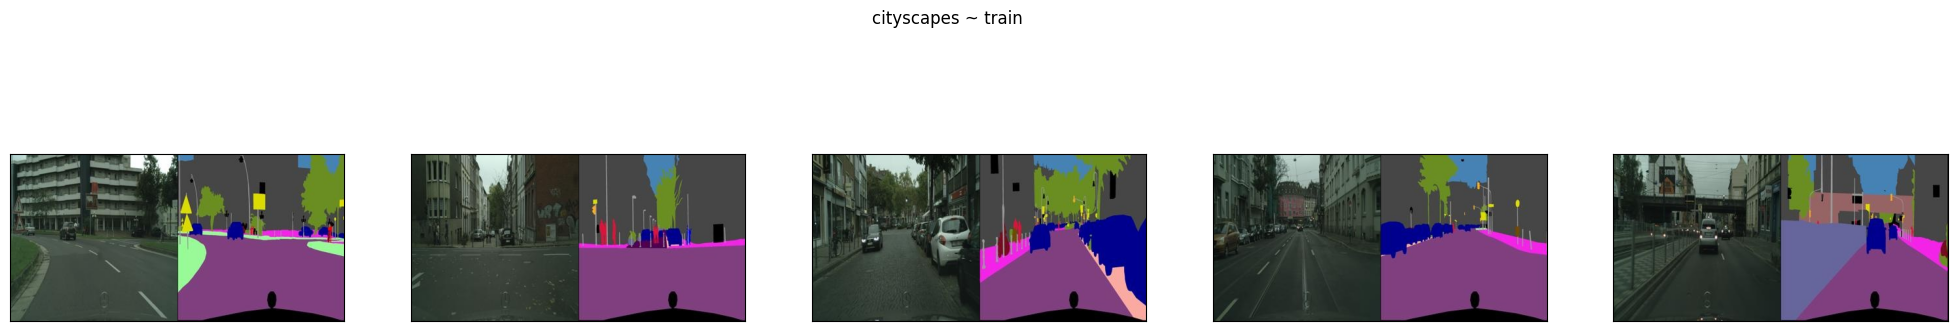

Split 'val' of dataset 'cityscapes' --> size: 500


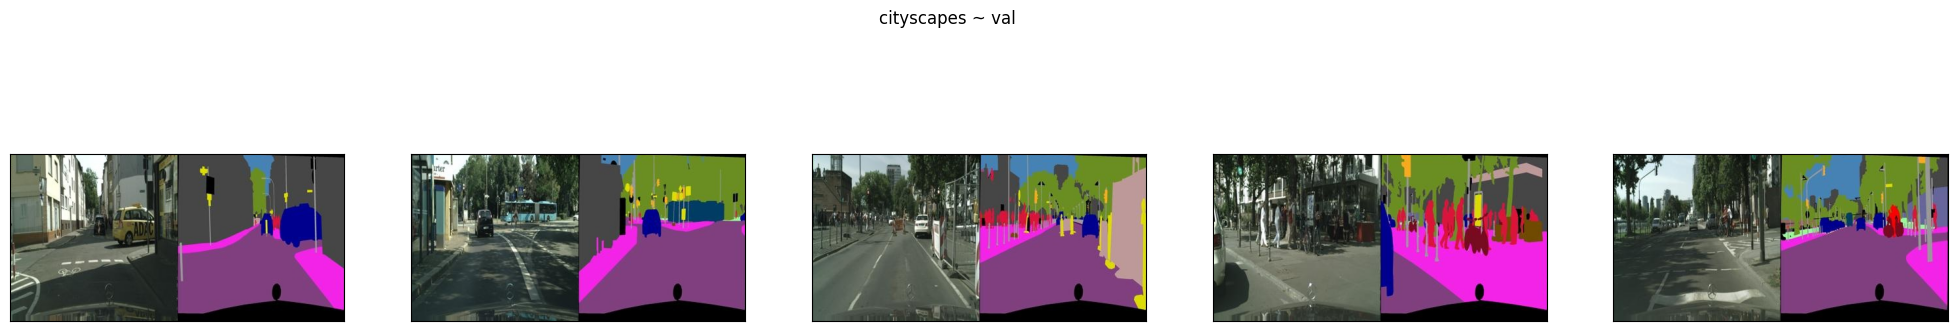


----------------------------



In [ ]:

# dataset_folder = "data"
# num_images_per_split = 5

# !mkdir -p {dataset_folder}

# # В этом цикле каждый из предложенных датасетов
# #  - скачивается
# #  - распаковывается
# #  - отрисовывается + meta
# #  - удаляется

# # Предлагается посмотреть на все предложенные варианты датасетов и затем оставить один,
# #  с которым захочется работать больше всего - закомментируйте (или удалите) все, кроме
# #  выбранного, а так же закомментируйте строчки с удалением скачанного датасета
# for dataset_name in [
#     # Unpaired
#     # "apple2orange",
#     # "summer2winter_yosemite",
#     # "horse2zebra",
#     # "monet2photo",
#     # "cezanne2photo",
#     # "ukiyoe2photo",
#     # "vangogh2photo",
#     # # Paired
#     # "maps",
#     # "facades",
#     "cityscapes"
# ]:
#     print(f"Dataset '{dataset_name}'")
#     # url = f"http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/{dataset_name}.zip"
#     url = f"http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{dataset_name}.tar.gz"
#     # download_path = os.path.join(dataset_folder, f"{dataset_name}.zip")
#     download_path = os.path.join(dataset_folder, f"{dataset_name}.tar.gz")
    
#     target_folder = os.path.join(dataset_folder, dataset_name)

    
#     print("Loading zip file...", end="")
#     # Проверяем что нет такого загруженого файла
#     if not os.path.isfile(download_path) or os.path.exists(target_folder):
#         # # Можно загрузить через requests библиотеку
#         # response = requests.get(url)
#         # open(download_path, "wb").write(response.content)
        
#         # Можно загрузить через wget
#         !wget {url} -O {download_path}
#     print(" --> done!")
    
#     print("Unziping...", end="")
#     # Распаковываем
#     if os.path.exists(target_folder):
#         !rm -r {target_folder}
#     !mkdir -p {dataset_folder}
#     # !unzip -qq {download_path} -d {dataset_folder}
#     !tar -xf {download_path} -C {dataset_folder}
#     print(" --> done!")
    
#     # Удаляем zip-файл
#     !rm {download_path}
    
#     # Meta + Отрисовка
#     print(f"Provided splits: {os.listdir(target_folder)}")
#     # Удобный способ быстро получить датасет картинок с лэйблами, если картинки разложены по папкам в формате:
#     # root_folder/label_name/img.jpg
#     # (в нашем случае нет лэйблов, но картинки разложены в таком же формате, просто вместо label_name идёт
#     #  split_name: trainA/testA/trainB/testB)
#     dataset = datasets.ImageFolder(target_folder)

#     inds_to_show = {i: [] for i, _ in enumerate(dataset.classes)}
#     classes_full = 0
#     for dataset_ind in range(len(dataset)):
#         _, split_ind = dataset[dataset_ind]
#         if len(inds_to_show[split_ind]) == num_images_per_split:
#             continue
#         inds_to_show[split_ind].append(dataset_ind)
#         if len(inds_to_show[split_ind]) == num_images_per_split:
#             classes_full += 1
#         if classes_full == len(dataset.classes):
#             break

#     for split_name in sorted(dataset.classes):
#         split_ind = dataset.class_to_idx[split_name]
#         print(f"Split '{split_name}' of dataset '{dataset_name}'", end="")
#         split_folder = os.path.join(target_folder, split_name)
#         print(f" --> size: {len(os.listdir(split_folder))}")

#         plt.subplots(1, num_images_per_split, figsize=(5 * num_images_per_split, 5))
#         plt.suptitle(f"{dataset_name} ~ {split_name}", y=0.95)
#         for i, dataset_ind in enumerate(inds_to_show[split_ind]):
#             plt.subplot(1, num_images_per_split, i + 1)
#             plt.imshow(dataset[dataset_ind][0])
#             plt.xticks([])
#             plt.yticks([])
#         plt.show()

#     # # Удаляем скачанный датасет
#     # !rm -r {target_folder}
    
#     print("\n----------------------------\n")